In [52]:
# Beofre carrying out any work, I import my required libraries, and load my data into a pandas DataFrame:
# import libraries
import pandas as pd
import numpy as np
import prince
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [53]:
# I load the dataset into a panda data frame:
data= pd.read_csv('/Users/jenniferfortuny/02450_project/2023-09-15_jennifer_pca_section/2023-09-08_jennifer_filtered_complete_copy.csv')

In [54]:
"""
Create Data Visualisation:
--------------------------------------------------------------------------------------------------------------------------------
1. Check for outliers.
For the continuous attributes: age, edu-num, hour-per-week.
I make a histogram with a boxplot.

For the categorical attributes: workclass, occupation.
I only make a histogram.
"""

'\nCreate Data Visualisation:\n--------------------------------------------------------------------------------------------------------------------------------\n1. Check for outliers.\nFor the continuous attributes: age, edu-num, hour-per-week.\nI make a histogram with a boxplot.\n\nFor the categorical attributes: workclass, occupation.\nI only make a histogram.\n'

In [55]:
# I begin by splitting my attributes into two lists:
continuous_attributes = data.columns[:3]
categorical_attributes = data.columns[3:]
# I use one-hot encoding to encode categorical attributes
categorical_encoded = pd.get_dummies(data, columns=categorical_attributes, drop_first=True)

/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


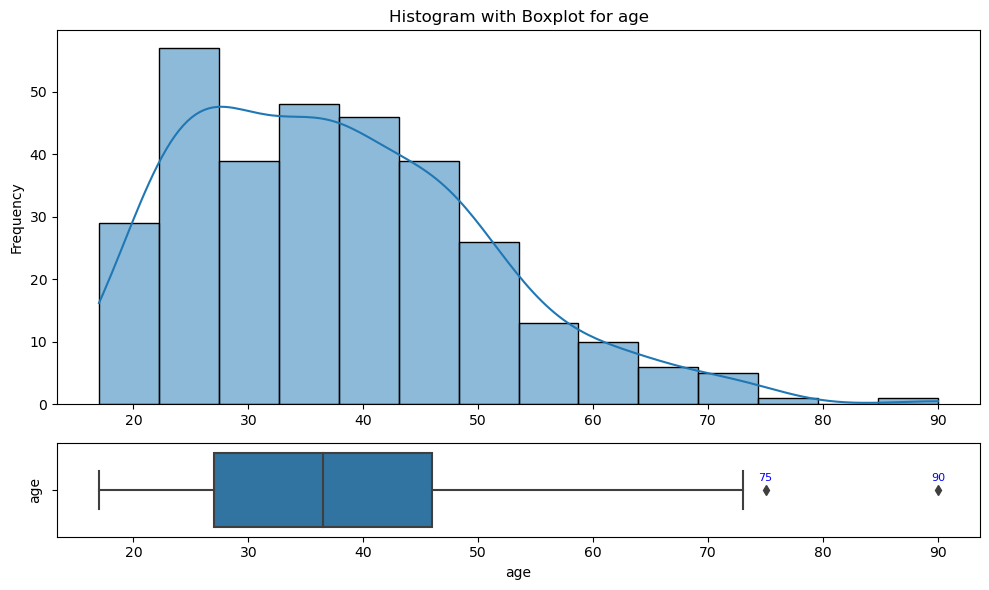

/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


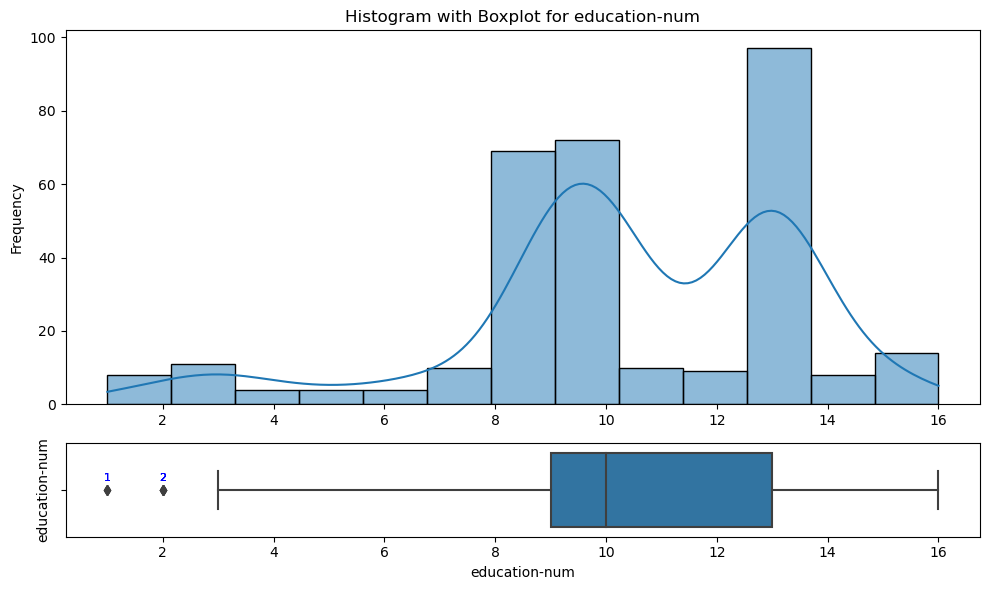

/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


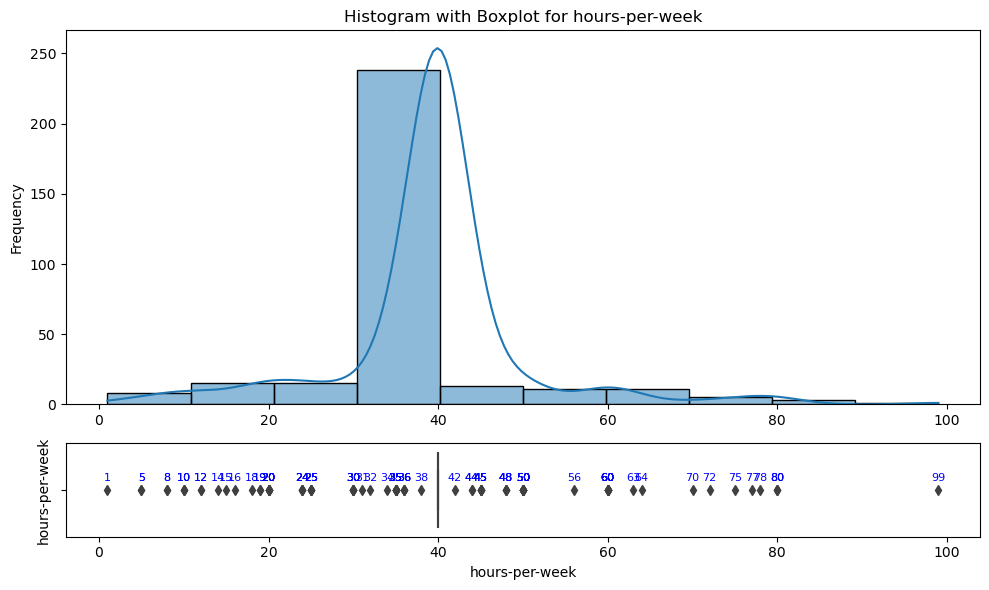

In [56]:
# I plot the histogram with box plot for each of the three continous attributes:
for column in continuous_attributes:
    fig = plt.figure(figsize=(10, 6))

    # Create grid
    gs = fig.add_gridspec(2, 1, height_ratios=[4, 1])
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    # Histogram on the top axis (ax1)
    sns.histplot(data[column], kde = True, ax = ax1)
    ax1.set_title(f'Histogram with Boxplot for {column}')
    ax1.set_xlabel('') # This is to keep the x-axis label empty on the top
    ax1.set_ylabel('Frequency')

    # Box plot on the bottom axis (ax2)
    sns.boxplot(x = data[column], ax = ax2)
    ax2.set_xlabel(column)

    # I find and label the outliers on the box plot
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR))
                                   | (data[column] > (Q3 + 1.5 * IQR))][column]
    for outlier in outliers:
        ax2.text(outlier, -0.18, f'{outlier:.0f}', ha='center', va='top', fontsize=8, color='blue')
        # -0.02 places my text at y = -0.02, i.e. below the dot on the box plot.
    plt.tight_layout()
    ax2.set_ylabel(column)
    plt.show()

/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


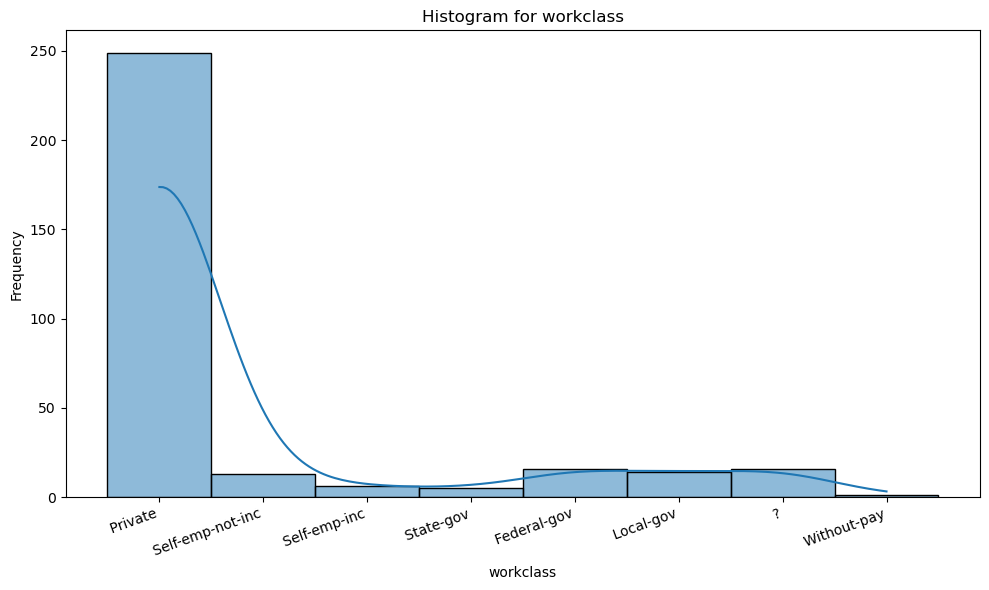

/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


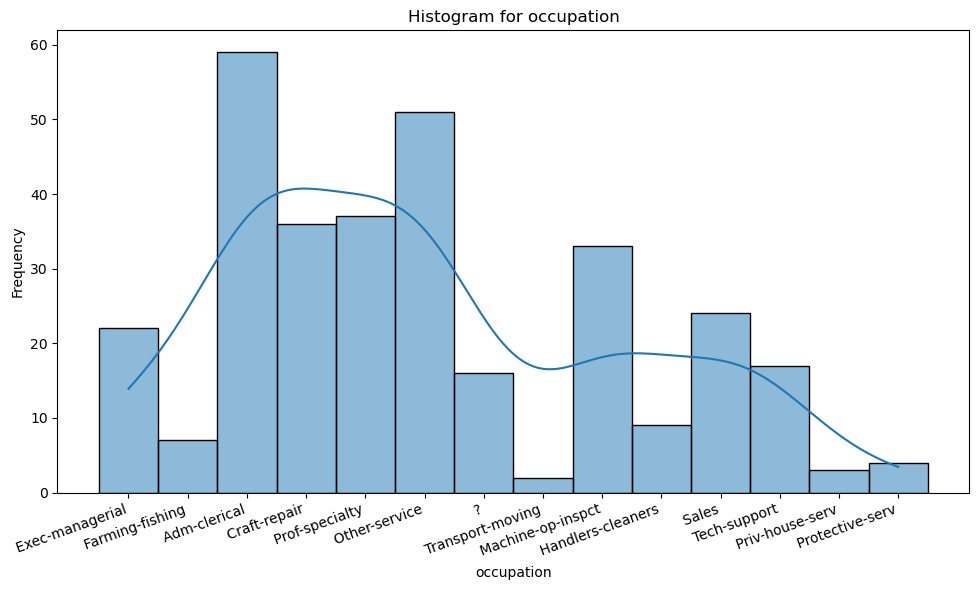

/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jenniferfortuny/miniconda3/envs/2023-09-01-02450ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


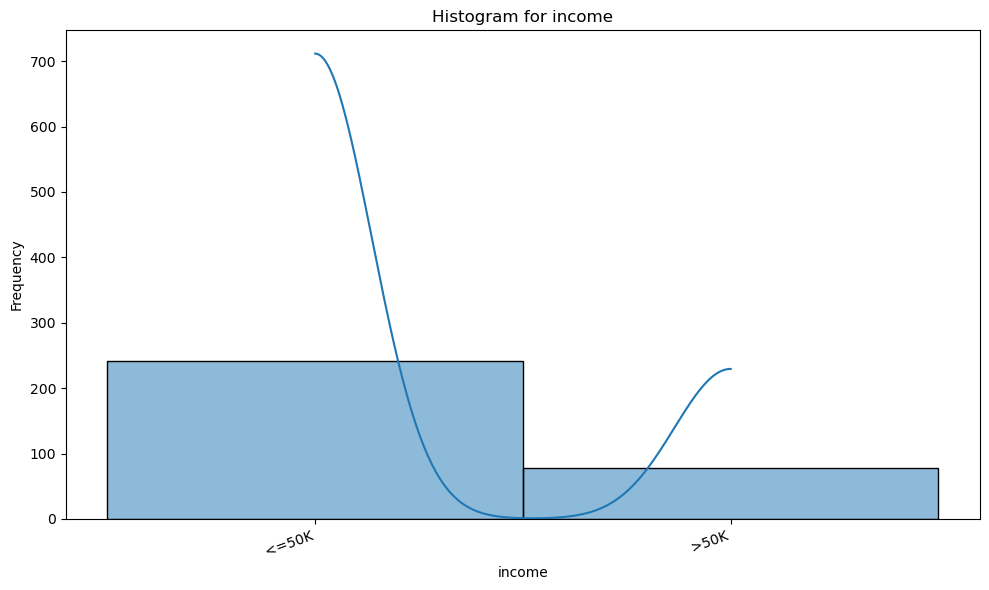

In [57]:
# Replace these two with Jame's plot
# I plot the histogram-only plots for each of the three continous attributes:
for column in categorical_attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde = True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # I angle the x-axis labels a bit to show all the words clearly
    plt.xticks(rotation=20, ha='right', fontsize=10)

    plt.tight_layout()
    plt.show()

In [58]:
"""
2. Check for outliers.
# To check if the attributes are normally distributes,
# I will begin by reflectiong on the results of the histograms:
# continous attributes:
#     age: tail to the right, so right sqewed distribution.
#     edu-num: looks like a bimodial distribution.
#     hours-per-week: looks like an extreme plot with on highly frequent value at 35-40.
# categorical attributes:
#    workclass: extreme with "Private" at the highest frequency.
#    occupation: some outliers, most seem to be at the similar frequency, no clear trend.

# I will use Q-Q plots to determin if they attributes have a formal normal distribution.
# If the data are mostly on the y=x line in the Q-Q plot, then we can assume there is a normal distribution.
# I will plot the continous variables' Q-Q plots:
"""

'\n2. Check for outliers.\n# To check if the attributes are normally distributes,\n# I will begin by reflectiong on the results of the histograms:\n# continous attributes:\n#     age: tail to the right, so right sqewed distribution.\n#     edu-num: looks like a bimodial distribution.\n#     hours-per-week: looks like an extreme plot with on highly frequent value at 35-40.\n# categorical attributes:\n#    workclass: extreme with "Private" at the highest frequency.\n#    occupation: some outliers, most seem to be at the similar frequency, no clear trend.\n\n# I will use Q-Q plots to determin if they attributes have a formal normal distribution.\n# If the data are mostly on the y=x line in the Q-Q plot, then we can assume there is a normal distribution.\n# I will plot the continous variables\' Q-Q plots:\n'

<Figure size 1000x600 with 0 Axes>

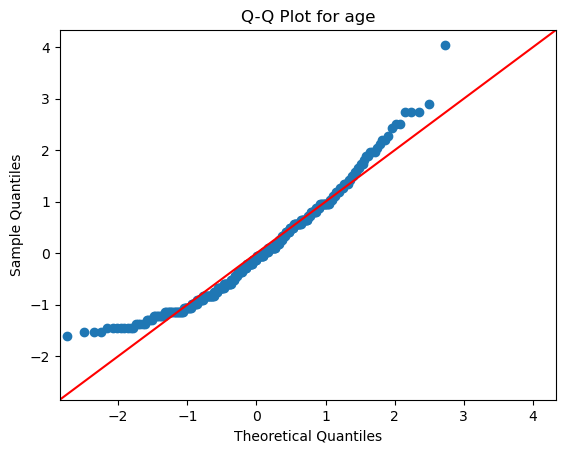

<Figure size 1000x600 with 0 Axes>

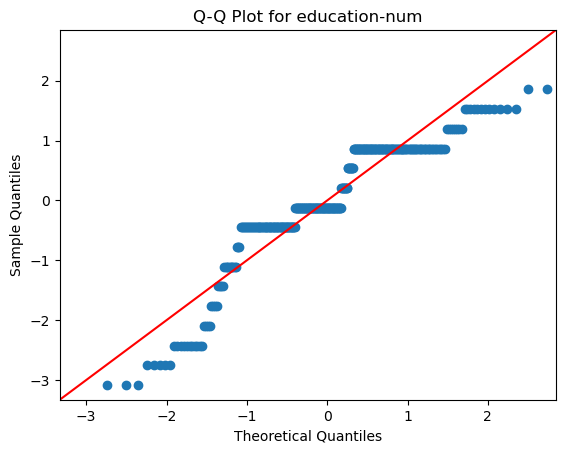

<Figure size 1000x600 with 0 Axes>

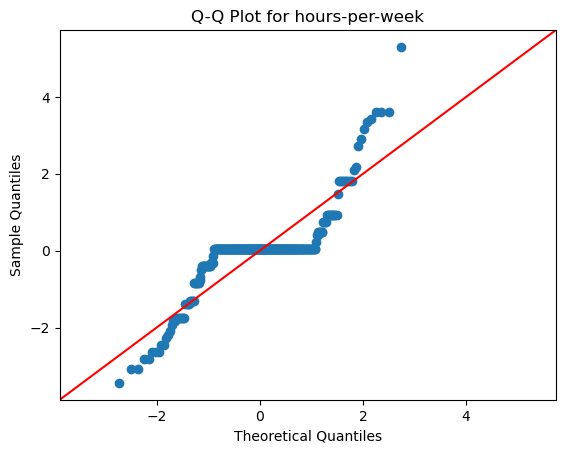

"\nNotes:\nThe age attribute shows a U-shape pattern.\nThe points fall below the y=x line at the lower end, and above the line at the higher end.\nThis suggests we have fewere extreme values than we would expect compared to a perfect normal distribution\ni.e. it is a lighter-tailed than a normal distribution.\nTherefore we have a somewhat uniform distribution, what is more concentrated around the median, less so towards the tails.\nThis means our data could have a wide range of ages, \nand when compared to a normal distribution -  as many individuals who are very young or very old.\nThis could be becasue the data is focused on working age adults, which would include less people who are very young or very old.\nThe right skew in the histogram suggests relatively less older individuals than younger ones.\n\nThe edu-num distribution shows a shape similar to w, this suggests a binomial distribution, in agreement with the histogram.\nThis suggests the data has two major distributions of edu

In [59]:
# I will rename the previous variable:
for column in continuous_attributes:
    # Since I am also using statsmodels now, in addition to matplotlib.
    # Here I create a figure and axis just for the Q-Q plot
    plt.figure(figsize=(10, 6))
    sm.qqplot(data[column].dropna(), line = '45', fit = True)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()
    plt.close()
"""
Notes:
The age attribute shows a U-shape pattern.
The points fall below the y=x line at the lower end, and above the line at the higher end.
This suggests we have fewere extreme values than we would expect compared to a perfect normal distribution
i.e. it is a lighter-tailed than a normal distribution.
Therefore we have a somewhat uniform distribution, what is more concentrated around the median, less so towards the tails.
This means our data could have a wide range of ages, 
and when compared to a normal distribution -  as many individuals who are very young or very old.
This could be becasue the data is focused on working age adults, which would include less people who are very young or very old.
The right skew in the histogram suggests relatively less older individuals than younger ones.

The edu-num distribution shows a shape similar to w, this suggests a binomial distribution, in agreement with the histogram.
This suggests the data has two major distributions of education levels.

The hours-per-week Q-Q plot shows a sharp incline, a long flat section, then another sharp incline.
The flat section is the major accumulation of the data, with coincides with the histogram.
The large portion of the dataset are people who work standard full-time hours.
This is a non-linear Q-Q plot, so it does NOT show a normal distribution.

For the categorical variables, I don't expect a normal distribution.
It might be more valuable to understand the frequency and mode of these attributes.
From the observations of the histogram:
The workclass attributes prodominatly represents the private sector.
The occpupation attribute shows a more uniform distribution, with some roles acting as outliers.
"""

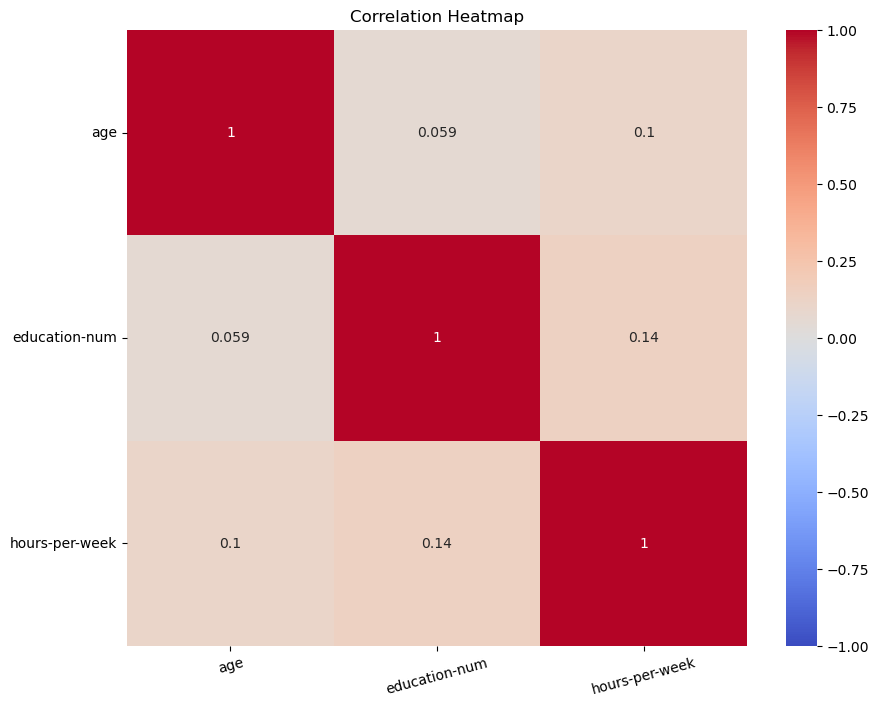

In [60]:
"""
3. Check correlations between variables.
I want to visualise this continous with a heatmap, using a correlation matrix.
This will help show the relationships between the continous variables.
"""
# First a calculate the correlation matrix:
corr = data[continuous_attributes].corr()
# Then I make a heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=15)
plt.show()

In [61]:
"""
Carry-out the PCA analysis:

If your attributes have different scales you,
should include the step where the data is standardizes
by the standard deviation prior to the PCA analysis.

1. The amount of variation explained as a function of the number of PCA components included.
2. The principal direction of the considered PCA components (either find a way to plot them or interpret them in terms of the features).
3. The data projected onto the considered principal components.

"""
# First I will take somes steps to prepare the data for visualisation and clustring.
# I will put the continous and encoded categorical attributes together
final_data = pd.concat([data[continuous_attributes], categorical_encoded], axis = 1)
print(final_data.head())
# Then I will standarise the data
scaler = StandardScaler()
data_standarized = scaler.fit_transform(final_data)

   age  education-num  hours-per-week  age  education-num  hours-per-week  \
0   33             13              40   33             13              40   
1   42              9              40   42              9              40   
2   37             10              75   37             10              75   
3   24             10              40   24             10              40   
4   27             10              40   27             10              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False                True   
1                   False                 False               False   
2                   False                 False               False   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  ...  occupation_ Handlers-cleaners  \
0                    False  ...             

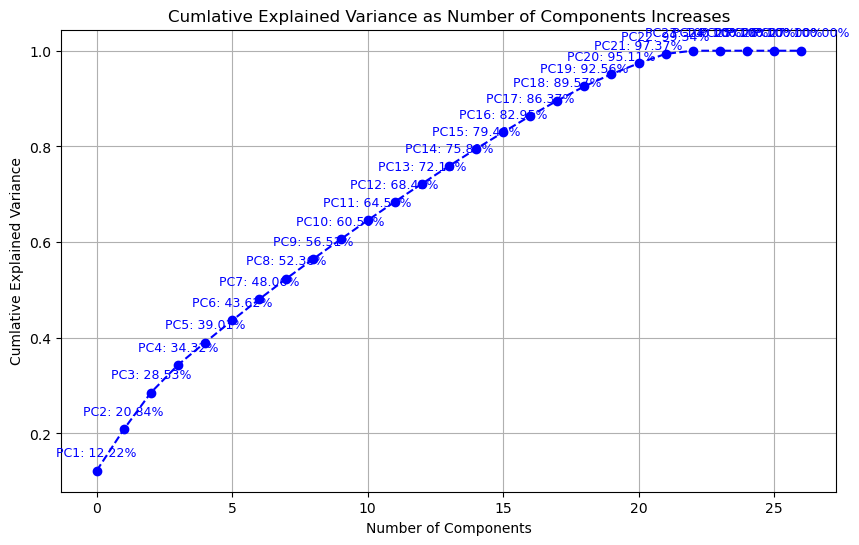

In [62]:
"""
Now I wil carry out the PCA analysis.
I will start by running the PCA without initially setting a number of components.
This will help me understand the total explained variance for each component.
It will also be helpful in determining the number of PCs that would capture most of the dataset's variance.
"""
# PCA applied without specifying the number of components.
pca = PCA()
principal_components_full = pca.fit_transform(data_standarized)
# Now, I will look into the explained variance.
# I will plot the explained variance ratio, to see how much variance each component explains.
# This will help me determin a good number of PCs.
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# I will check for the first n components that explain 95% or more of the variance.
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
# I will annotate the PCAs on the plot
# It seems like the first 20 to 22 PCs explain over 95% of the variance in the data.
for i in range(len(cumulative_variance)):
    plt.annotate(f"PC{i+1}: {cumulative_variance[i] * 100:.2f}%",
                 (i, cumulative_variance[i]),
                 textcoords="offset points",
                 xytext = (0, 10),
                 ha = 'center',
                 fontsize = 9,
                 color = 'blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumlative Explained Variance')
plt.title('Cumlative Explained Variance as Number of Components Increases')
plt.grid(True)
plt.show()

In [63]:
"""
Given that we are working with a large number of potential PCs
# I will carry out some dimensional reduction, 
# and only use three PCs for the PCA analysis and visualisation.
# I will also try to retain as much information about the data as possible.
# To confirm the results from the graph:
"""
print(f"Cumulative variance explained by first 20 components: {cumulative_variance[19]*100:.2f}%")
print(f"Cumulative variance explained by first 21 components: {cumulative_variance[20]*100:.2f}%")
# 21 PCs is a lot of PCs. This is most likely the result of having used one-hot encoding for our categorical data.
# I want to use much fewer PCs but:
print(f"Cumulative variance explained by first 3 components: {cumulative_variance[3]*100:.2f}%")
"""
# Given this situation. I would like to apply the PCA only on to the continous part, and the MCA on the categorical part.
# I will first apply MCA to the categorical attributes.
"""
# I will initialise MCA with the prince module and fit the encoded categorical data:
# To begin, I will not specify the number of components
mca = prince.MCA()
mca = mca.fit(categorical_encoded)
# Now I will transform the categorical data
mca_coordinates = mca.transform(categorical_encoded)
# Now, I will take a look at MCA's explained inertia for each component,
# which is similar to PCA's explained variance.
# I will start by getting the eigenvalues:
eigenvalues = mca.eigenvalues_
# Calculate the total inertia:
total_inertia = sum(eigenvalues)
# Now get the proportion of explained inertia:
explained_inertia = [eig/total_inertia for eig in eigenvalues]
print(f"MCA's result shows that there are {len(explained_inertia)} PCs for our categorical data:")
for i, inertia in enumerate(explained_inertia, start=1):
    print(f"PC{i}: {inertia*100:.2f}% of the variance")

Cumulative variance explained by first 20 components: 95.11%
Cumulative variance explained by first 21 components: 97.37%
Cumulative variance explained by first 3 components: 34.32%
MCA's result shows that there are 2 PCs for our categorical data:
PC1: 52.18% of the variance
PC2: 47.82% of the variance


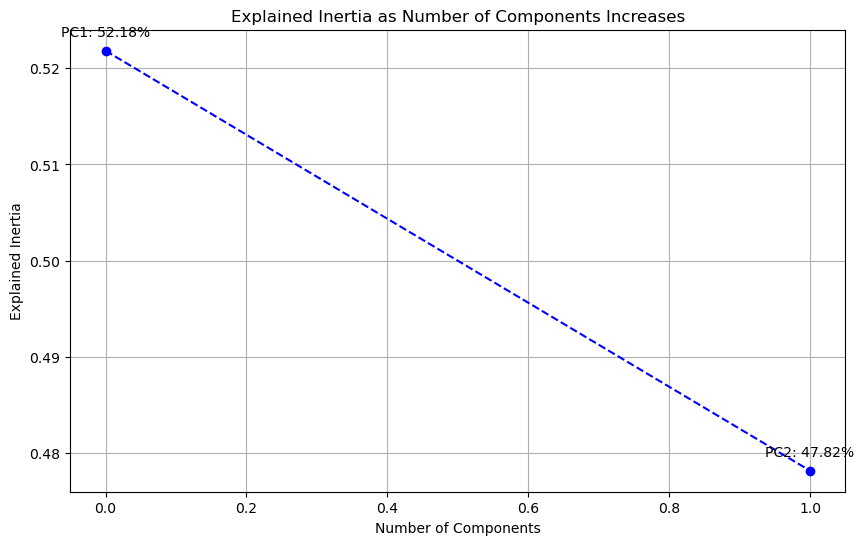

In [64]:
# Now I will plot the explained inertia:
plt.figure(figsize = (10,6))
plt.plot(explained_inertia, marker = 'o', linestyle = '--', color = 'b')
# Annotating the points
for i, inertia in enumerate(explained_inertia):
    plt.annotate(f"PC{i+1}: {inertia*100:.2f}%", (i, inertia), 
                 textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('Number of Components')
plt.ylabel('Explained Inertia')
plt.title('Explained Inertia as Number of Components Increases')
plt.grid(True)
plt.show()

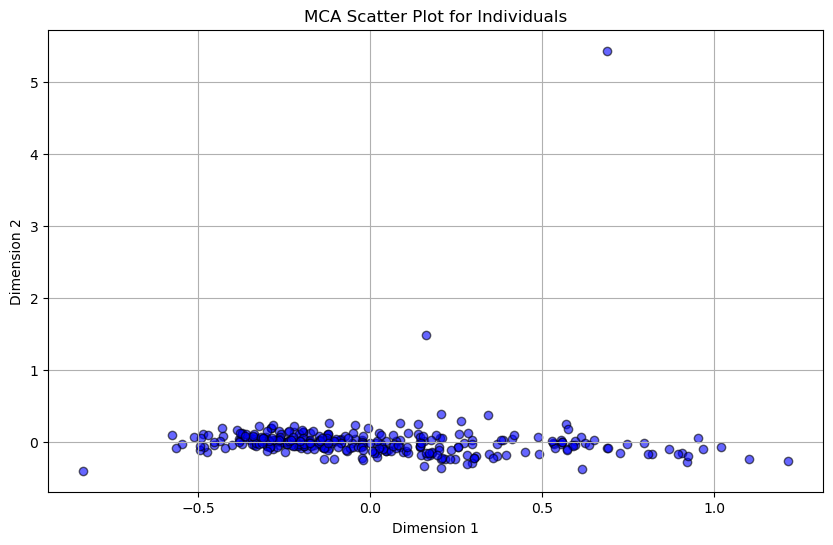

In [65]:
# I create a 2D scatter plot for the categorical values.
# First I extract coordinates for the first two components:
x = mca_coordinates[0]
y = mca_coordinates[1]
plt.figure(figsize = (10, 6))
plt.scatter(x, y, edgecolor="k", color="blue", alpha=0.6)
plt.title("MCA Scatter Plot for Individuals")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
# Display
plt.show()

# Noting the result form this MCA analysis on the categorical data
# There 2 PCs explain all the variation.

In [66]:
# Now I will move on to apply PCA on the continous data.
# First I use the column names to extract the continous data, i.e. no column names.
continous_data = data[continuous_attributes]
# Then I standarise the data:
continous_data_standarized = scaler.fit_transform(continous_data)
# Begining without specifying the number of components used.
pca = PCA()
pca_coordinates = pca.fit_transform(continous_data_standarized)
# Now I will take a loko at the explained variance of the continous columns:
explained_variance = pca.explained_variance_ratio_
print(f"There are {len(explained_variance)} PCs in total for the countinous attributes.")
print(f"Explained variance for each PC are: {explained_variance}")

There are 3 PCs in total for the countinous attributes.
Explained variance for each PC are: [0.40260661 0.31475936 0.28263403]


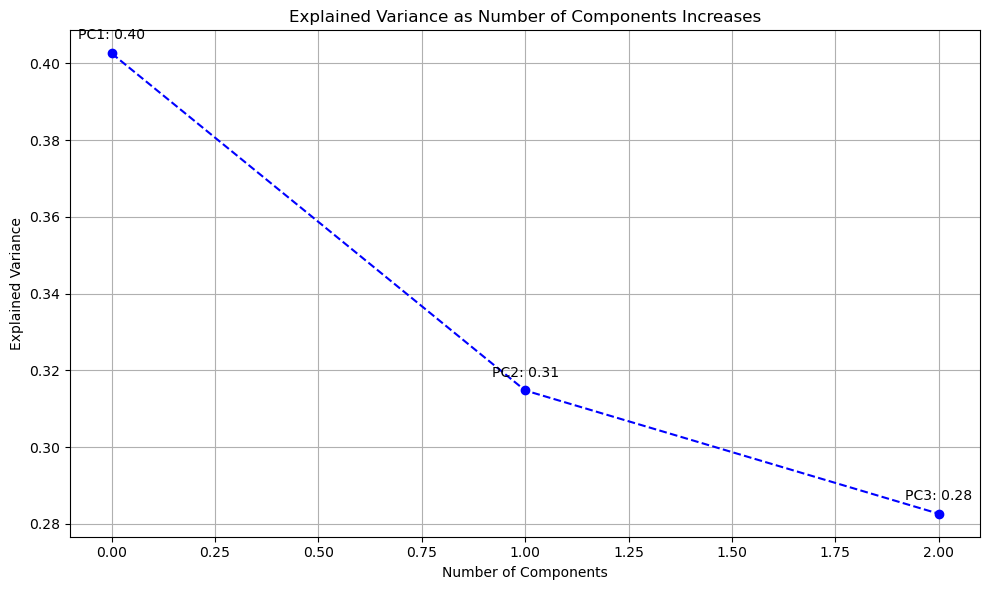

In [67]:
# I make a plot to take a look at how much variance each PC explains
plt.figure(figsize=(10,6))
plt.plot(explained_variance, marker='o', linestyle='--', color='b')
# I annotate the PCs on the plot
for i, var in enumerate(explained_variance):
    plt.annotate(f"PC{i+1}: {var:.2f}", (i, var),
                 textcoords = "offset points", xytext = (0, 10), ha = 'center')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance as Number of Components Increases")
plt.grid(True)
plt.tight_layout()
plt.show()

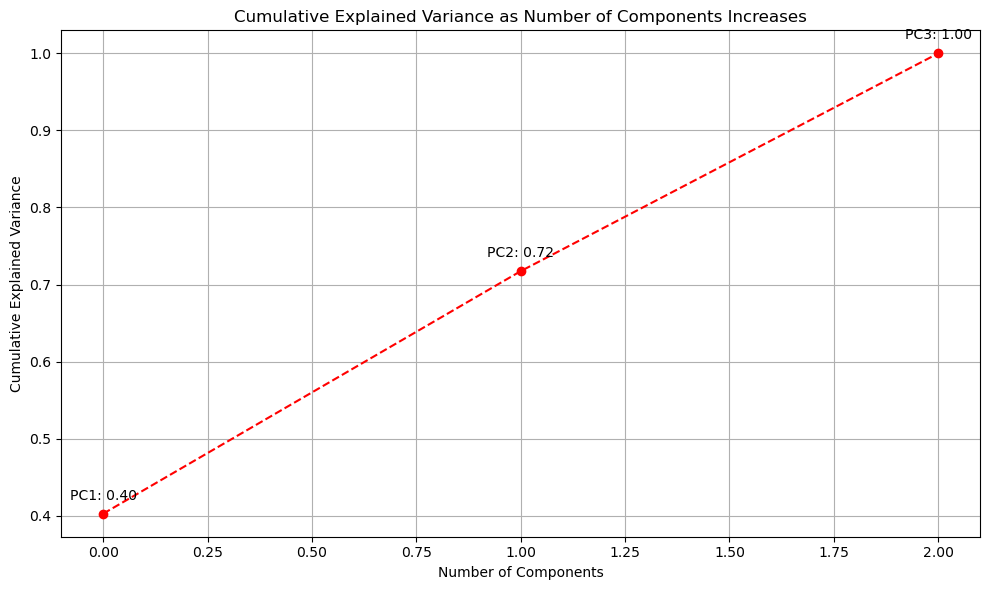

In [68]:
# I will also make a plot to take a look at the cumulative explained variance.
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize = (10, 6))
plt.plot(cumulative_variance, marker = 'o', linestyle = '--', color = 'r')
# I annotate the PC on the cumulative variance plot
for i, cum_var in enumerate(cumulative_variance):
    plt.annotate(f"PC{i+1}: {cum_var:.2f}", (i, cum_var),
                 textcoords="offset points", xytext = (0, 10), ha = 'center')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as Number of Components Increases')
plt.grid(True)
plt.tight_layout()
plt.show()

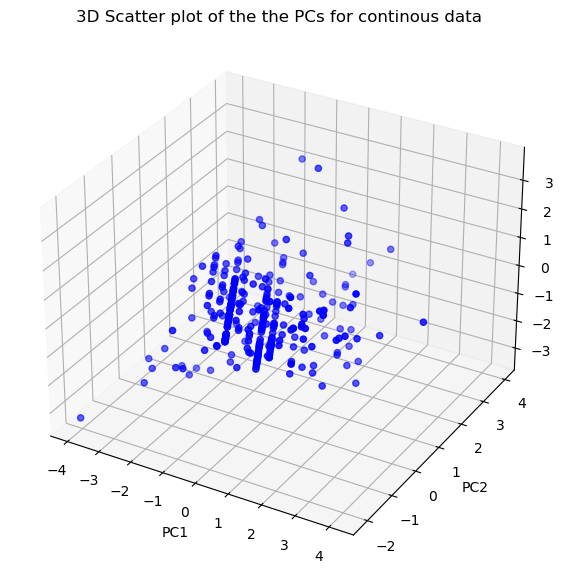

In [69]:
# I create a 3D scatter plot for the continous columns.
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')
# I will isolate the coordinates of the first 3PCs.
x = pca_coordinates[:, 0]
y = pca_coordinates[:, 1]
z = pca_coordinates[:, 2]
ax.scatter(x, y, z, c="b", marker = "o")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter plot of the the PCs for continous data')
plt.show()